<a href="https://colab.research.google.com/github/jblancoperez/fiap-desafio/blob/main/C%C3%B3pia_de_00_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sys
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import multicol




#!{sys.executable} -m pip install -U pandas-profiling[notebook]
#!jupyter nbextension enable --py widgetsnbextension

#!{sys.executable} -m pip install -U lafrom lazypredict.Supervised import LazyClassifier, LazyRegressor

def cm_to_inch(value):
    return value/2.54
#arquivo = pd.read_csv('https://raw.githubusercontent.com/jblancoperez/fiap-desafio/main/solicitacoescredito.csv')

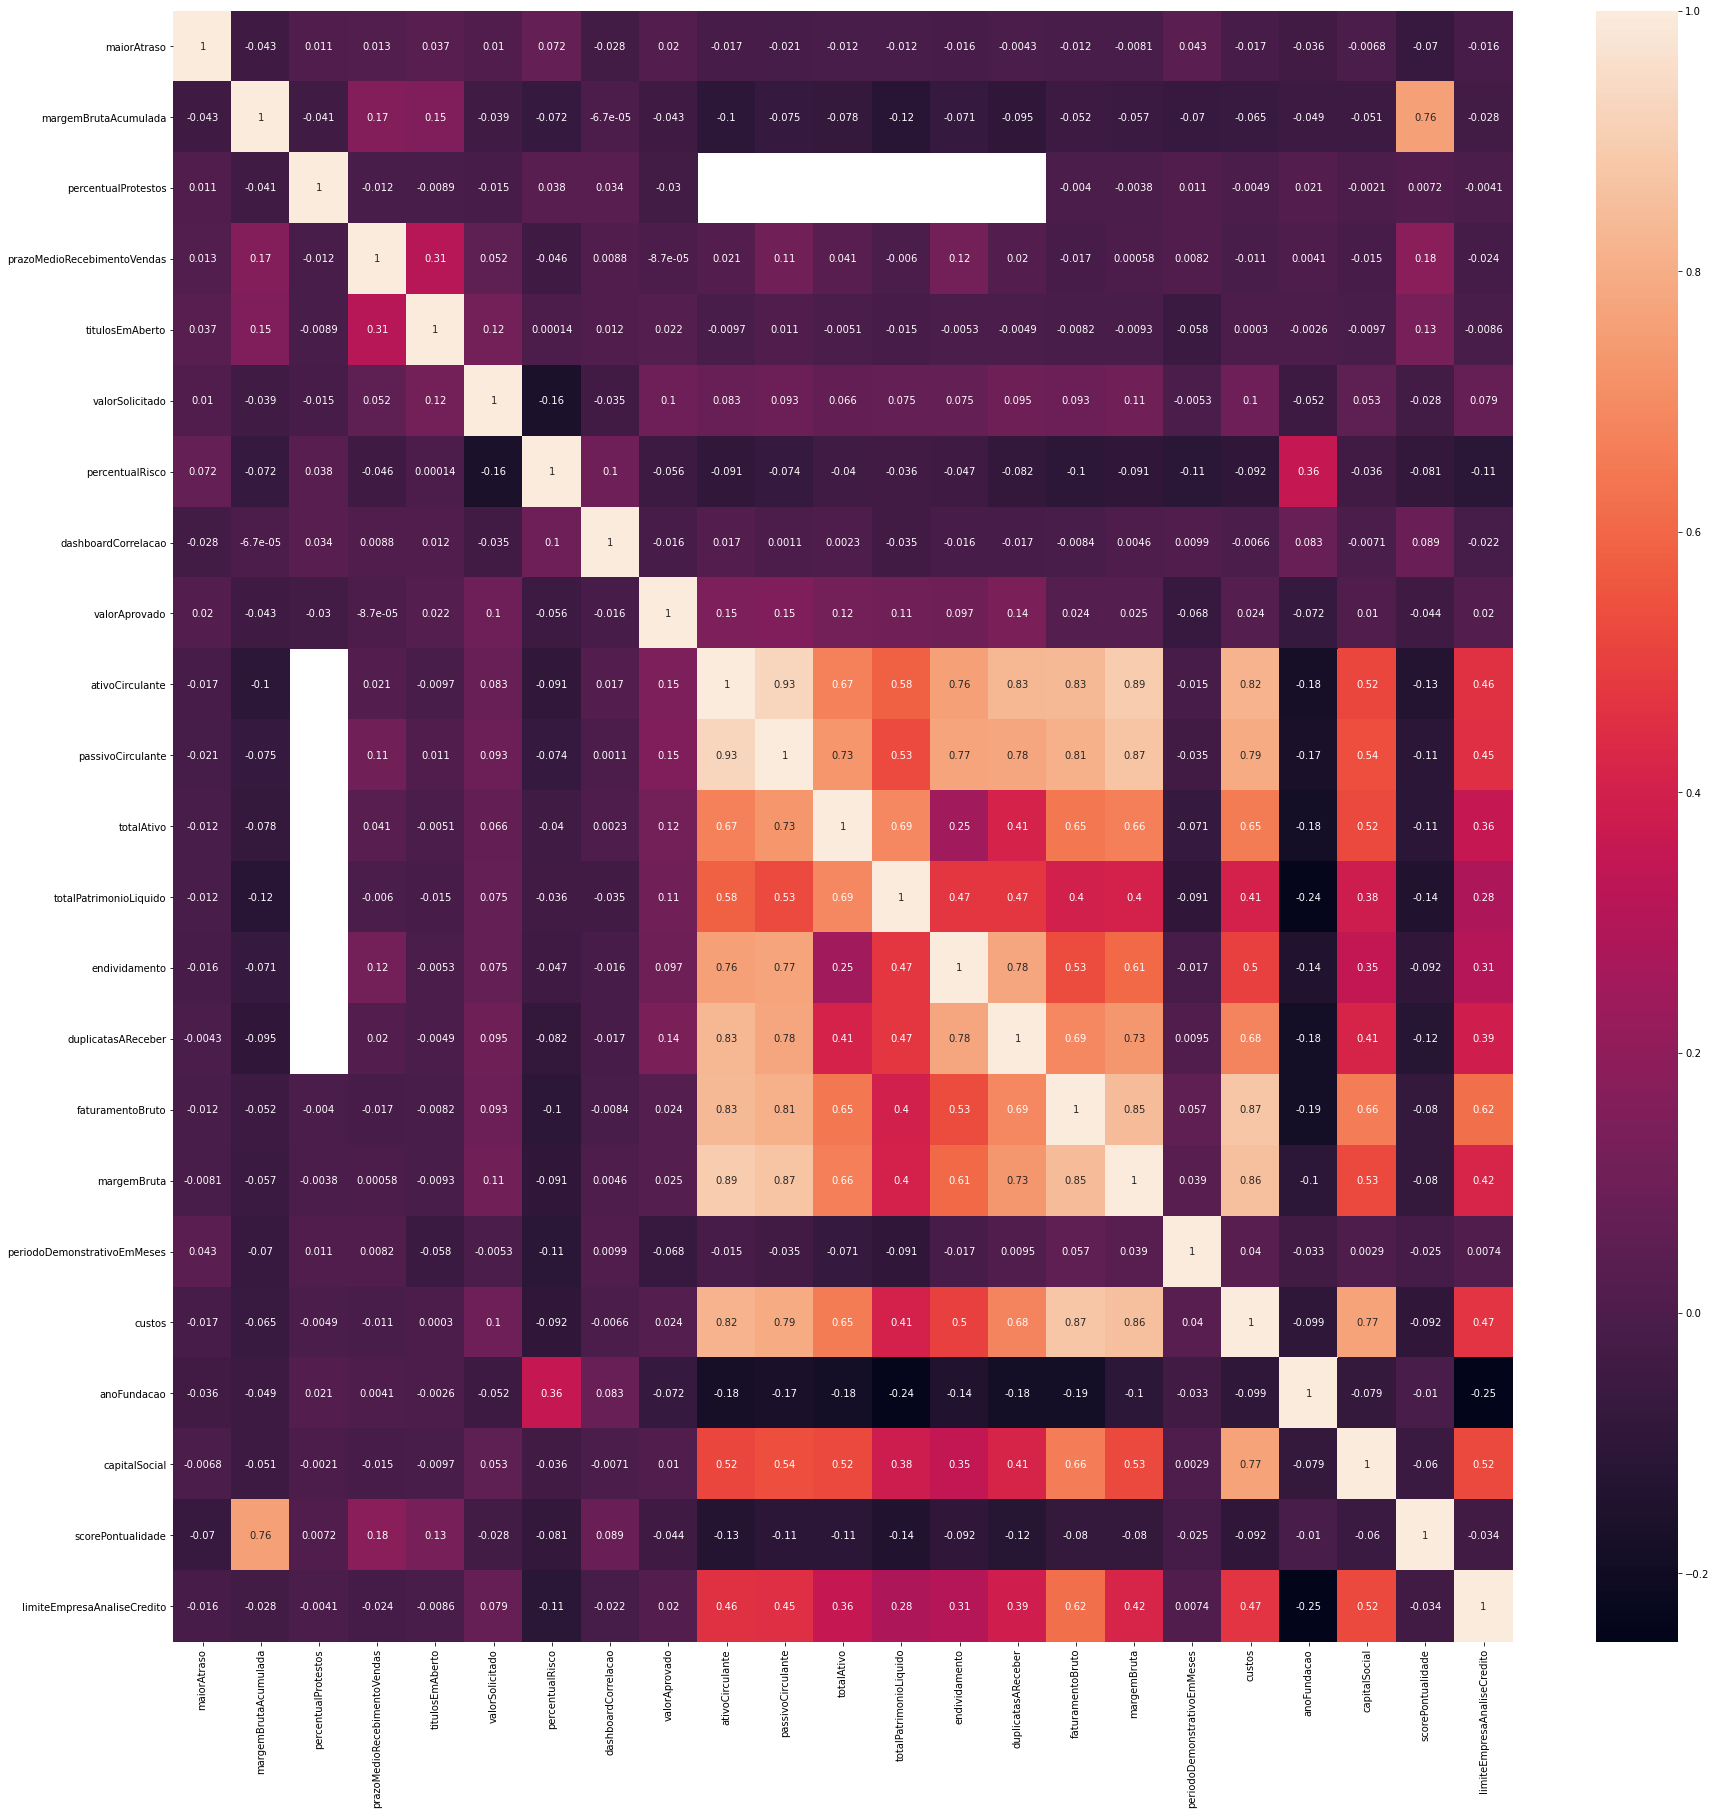

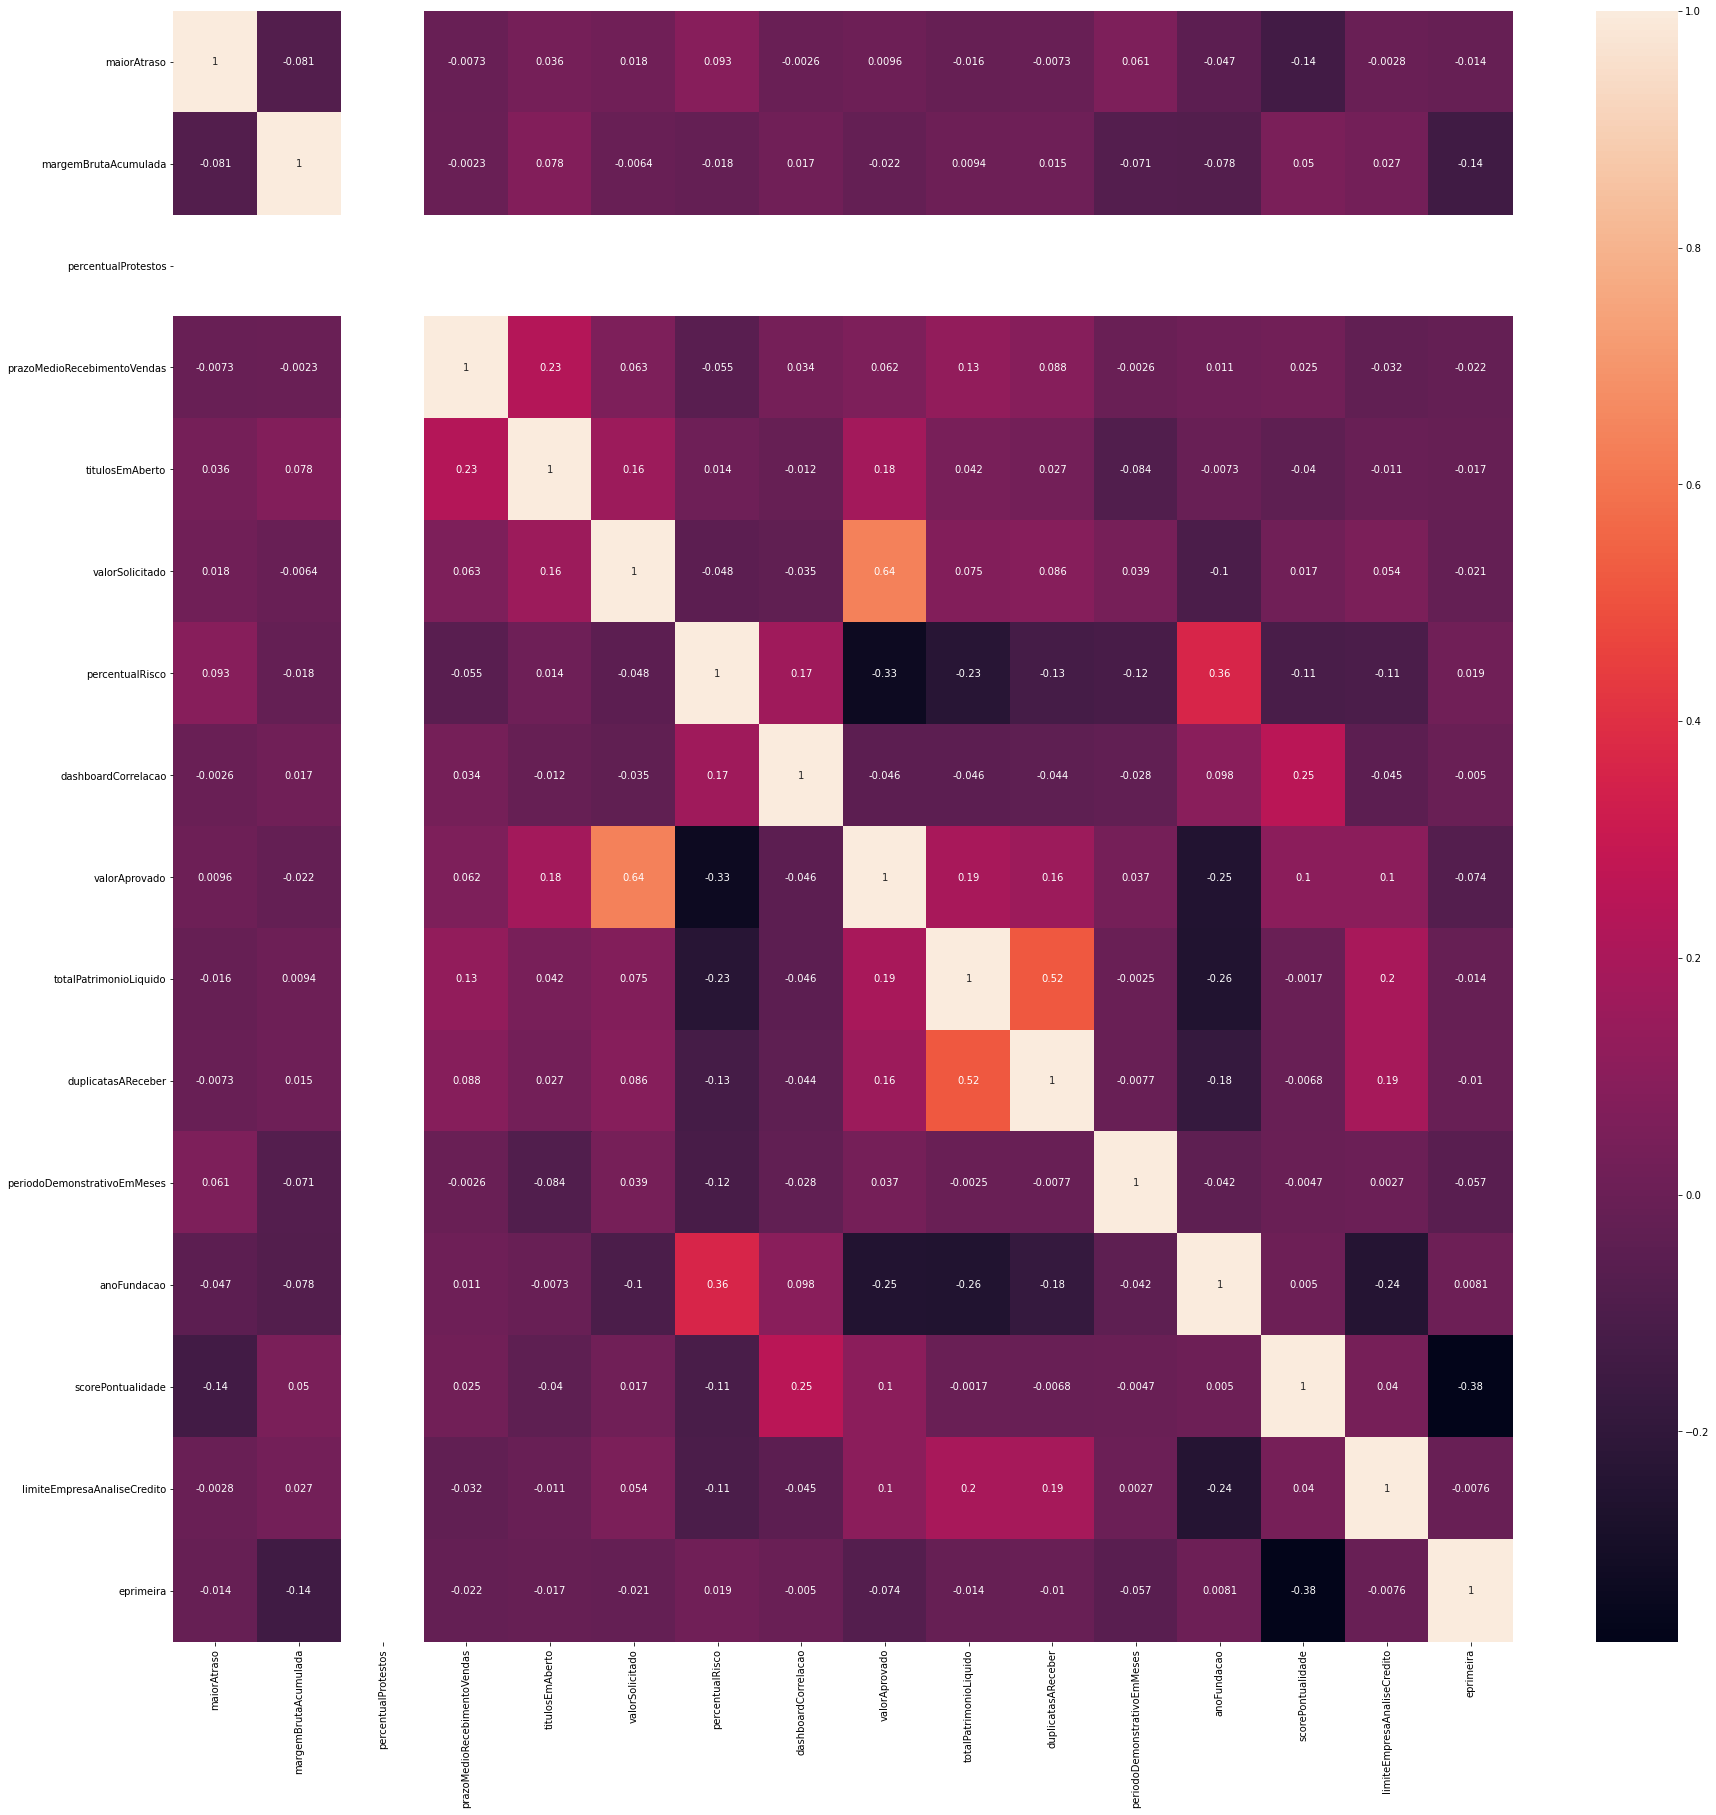

In [6]:
#Remove MultiCollinearity in input
arquivo = pd.read_csv('./solicitacoescredito.csv')
df=arquivo.loc[arquivo['status'].isin(['AprovadoAnalista','AprovadoComite'])]
toDrop= ['numero_solicitacao','razaoSocial','nomeFantasia','cnpjSemTraco','dataAprovadoEmComite','dataAprovadoNivelAnalista','diferencaPercentualRisco','estoque']
df=df.loc[df['valorAprovado']>0]
df=df.loc[df['valorSolicitado']>30000]
df=df.loc[df['valorSolicitado']<100000]
for i in toDrop:
    df=df.drop([i],axis=1)
from pandas import set_option
import seaborn as sb
set_option('precision', 2)
plt.figure(figsize=(30, 30))
corr = df.corr(method='pearson')
sb.heatmap(corr,  annot=True) 







invalidDates = [
    '0019-02-06T03:06:00',
    '0001-01-01T03:06:00',
    '0001-01-01T06:12:00',
    '0019-02-06T03:06:00',
    '0219-12-31T03:06:00'
]

for d in invalidDates:
    df['periodoBalanco']=df['periodoBalanco'].replace(d,np.nan)
df['periodoBalanco']=pd.to_datetime(df['periodoBalanco'],errors='coerce')
df['primeiraCompra']=pd.to_datetime(df['primeiraCompra'],errors='coerce')



df['eprimeira']=df['primeiraCompra'].isna()
df=df.drop(['primeiraCompra'],axis=1)
df=df.dropna()



ftRemover = multicol.MultiCollinearityEliminator(df,'valorAprovado',0.6)
df=ftRemover.autoEliminateMulticollinearity()


set_option('precision', 2)
plt.figure(figsize=(30, 30))
corr = df.corr(method='pearson')
sb.heatmap(corr,  annot=True) 






df=df.drop(['periodoBalanco'],axis=1)
df=df.drop(['intervaloFundacao'],axis=1)
df=pd.get_dummies(df, columns=["definicaoRisco","empresa_MeEppMei","restricoes","status"], prefix=["definicaoRisco","mei","restricoes","status"])
#Create dummy columns
y = df['valorAprovado'].values
X= df.drop(['valorAprovado'], axis=1).values




LR: -74849145935166.687500 (105648540947741.609375)
RD: -74554634080963.984375 (105232810270906.125000)
LS: -74715996562903.390625 (105460774994075.828125)
EL: -26550716061037.972656 (37369640195194.218750)
KNN: -90436591176.084671 (25310030879.005154)
DTR: -28790922084.344791 (7407238018.871570)
RF: -15667240274.957016 (1323911048.891459)
ADA: -31342348591.830952 (2788200919.157623)
SVR: -255451785688.400360 (13604853351.140253)
SVR-RBF: -254825115797.241852 (13623386048.857296)
SVR-Linear: -2462669132641.517090 (3187480977388.029785)
SVR-Poly: -426933001766515520.000000 (603756327008365824.000000)


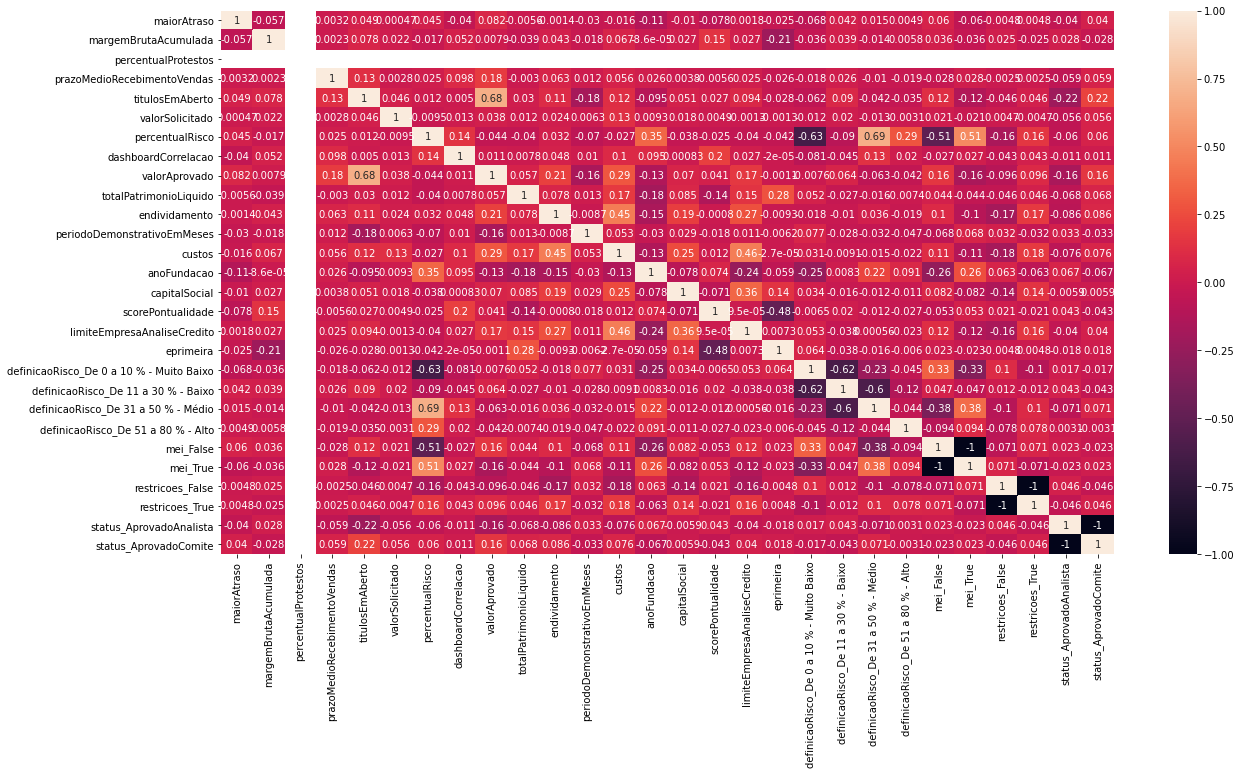

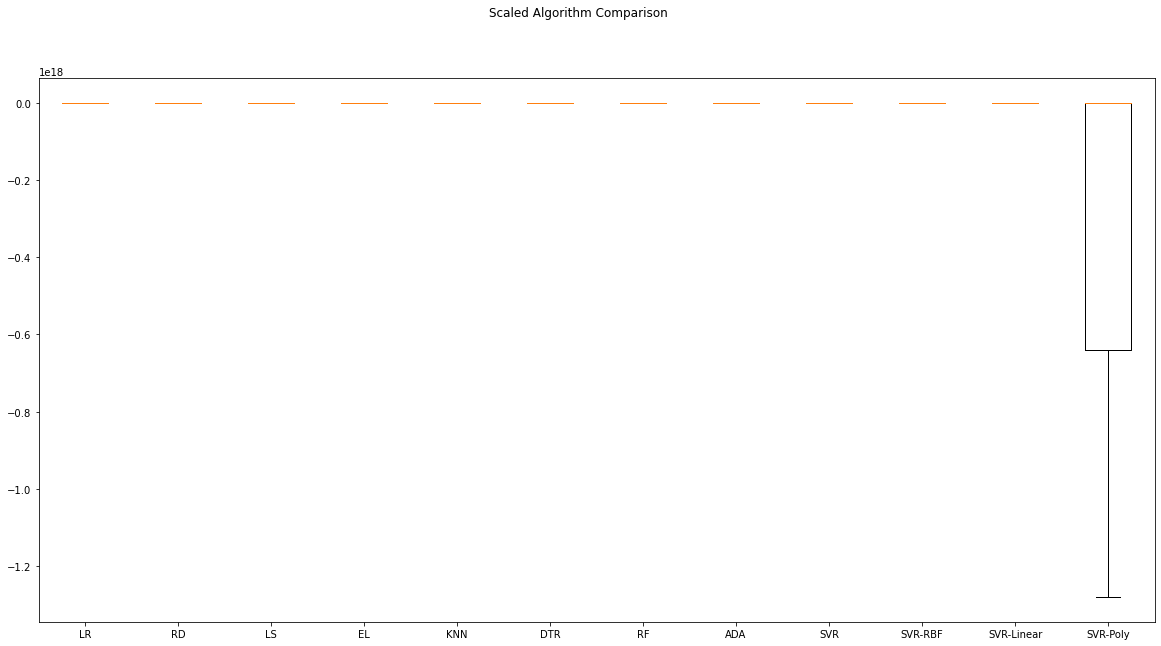

In [3]:
seed=42
test_size = 0.20

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
import matplotlib.pyplot as pyplot
from pandas import set_option
import seaborn as sb
set_option('precision', 2)
plt.figure(figsize=(20, 10))
corr = df.corr(method='pearson')
sb.heatmap(corr,  annot=True) 



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))

pipelines.append(('RD', Pipeline([('Scaler', StandardScaler()),('RD', Ridge())])))

pipelines.append(('LS', Pipeline([('Scaler', StandardScaler()),('LS', Lasso())])))

pipelines.append(('EL', Pipeline([('Scaler', StandardScaler()),('EL', ElasticNet())])))

pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))

pipelines.append(('DTR', Pipeline([('Scaler', StandardScaler()),('DTR', DecisionTreeRegressor())])))

pipelines.append(('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))

pipelines.append(('ADA', Pipeline([('Scaler', StandardScaler()),('ADA', AdaBoostRegressor())])))

pipelines.append(('SVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('SVR-RBF', Pipeline([('Scaler', StandardScaler()),('SVR', SVR(kernel='rbf', C=100, gamma=0.1))])))
pipelines.append(('SVR-Linear', Pipeline([('Scaler', StandardScaler()),('SVR', SVR(kernel='linear', C=100))])))
pipelines.append(('SVR-Poly', Pipeline([('Scaler', StandardScaler()),('SVR', SVR(kernel='poly', C=100, gamma='auto', degree=3))])))
results = []
names = []
num_folds = 3
RMS = 'neg_mean_squared_error'
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=RMS)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Comparando os Algorítimos
fig = pyplot.figure(figsize=(20, 10))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
    

In [ ]:
names = ["Nearest Neighbors", 
         "Nearest Neighbors 4",
         "Linear SVM", 
         "RBF SVM",
         "Decission Tree 5",
         "Decision Tree 7", 
         "Random Forest", 
         "Neural Net", 
         "AdaBoost",

        ]

classifiers = [
    KNeighborsRegressor(3),
    KNeighborsRegressor(4),
    SVR(kernel="linear", C=0.025),
    SVR(gamma=2, C=1),
    DecisionTreeRegressor(max_depth=5),
    DecisionTreeRegressor(max_depth=7),
    RandomForestRegressor(max_depth=5, n_estimators=10, max_features=3),
    MLPRegressor(alpha=1, max_iter=1000),
    AdaBoostRegressor(),
    ]
l=len(classifiers)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

list_scores=list()
list_std=list()
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = cross_validate(clf,X,y,n_jobs=2,verbose=0,cv=3,scoring =["neg_mean_squared_error","neg_mean_absolute_percentage_error","neg_mean_absolute_error"])

    print("Regressor {}. Mean Squared Error: {:,.2f}. Mean absolute percentage error: {:,.2f}. Mean Error {:,.2f}".
          format(name,-1*score['test_neg_mean_squared_error'].mean(),
                 -1*score['test_neg_mean_absolute_percentage_error'].mean(),-1*score['test_neg_mean_absolute_error'].mean()))

    
    





Regressor Nearest Neighbors. Mean Squared Error: 136,507,382,079.56. Mean absolute percentage error: 17.16. Mean Error 176,360.15
Regressor Nearest Neighbors 4. Mean Squared Error: 146,275,313,645.59. Mean absolute percentage error: 14.01. Mean Error 187,019.53


In [ ]:

from sklearn.metrics import SCORERS
print(SCORERS.keys())

In [ ]:
newDf.head()

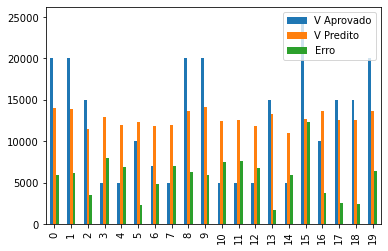

In [29]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
svr_rbf.fit(rescaledX, y_train)

rescaledTestX = scaler.transform(X_test)
predictions = svr_rbf.predict(rescaledTestX)


predictions=predictions.astype(int)
erros = np.absolute( y_test - predictions)
finalresult = pd.DataFrame({
        "V Aprovado": y_test,
        "V Predito": predictions,
        "Erro" : erros
    })

finalresult.head(20).plot(kind='bar')

finalresult.to_csv("predicted2.csv", index=False)

In [4]:


ada = AdaBoostRegressor()
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
ada.fit(rescaledX, y_train)

rescaledTestX = scaler.transform(X_test)
predictions = ada.predict(rescaledTestX)

predictions=predictions.astype(int)
erros = np.absolute( y_test - predictions)
finalresult = pd.DataFrame({
        "V Aprovado": y_test,
        "V Predito": predictions,
        "Erro" : erros
    })

finalresult.head(20).plot(kind='bar')

finalresult.to_csv("predicted2.csv", index=False)

NameError: name 'X_train' is not defined

In [7]:

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
#necessita do pydot pip install pydot
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, mean_squared_error
import tensorflow_probability as tfp




seed=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

qtd_features = len(X_train[0,:])
qtd_features
model = Sequential()
model.add(Dense(1024, input_dim=qtd_features, activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(1))
# Usa a função de perda mse (mean square error) e monitora o mae (mean absolute erro) e mse (mean square error)
model.compile(loss='mse',optimizer='adamax', metrics=['mae', 'mse'])

callbacks= [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='models/model.{epoch:02d}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

model.fit(X_train, y_train, epochs=200, batch_size=4,callbacks=callbacks)

y_pred = model.predict(X_test)








Epoch 1/200
231/231 [==============================] - 2s 9ms/step - loss: 2390974140.6897 - mae: 43521.7199 - mse: 2390974140.6897
Epoch 2/200
231/231 [==============================] - 2s 8ms/step - loss: 426968595.7241 - mae: 16238.3298 - mse: 426968595.7241
Epoch 3/200
231/231 [==============================] - 2s 8ms/step - loss: 464341164.0000 - mae: 16732.4417 - mse: 464341164.0000
Epoch 4/200
231/231 [==============================] - 2s 8ms/step - loss: 403265527.0345 - mae: 15732.5669 - mse: 403265527.0345
Epoch 5/200
231/231 [==============================] - 2s 8ms/step - loss: 375038687.3793 - mae: 15010.0515 - mse: 375038687.3793
Epoch 6/200
231/231 [==============================] - 2s 8ms/step - loss: 338473695.1724 - mae: 14284.0726 - mse: 338473695.1724
Epoch 7/200
231/231 [==============================] - 2s 9ms/step - loss: 420439466.2069 - mae: 15454.2553 - mse: 420439466.2069
Epoch 8/200
231/231 [==============================] - 2s 8ms/step - loss: 397921829.034

<AxesSubplot:>

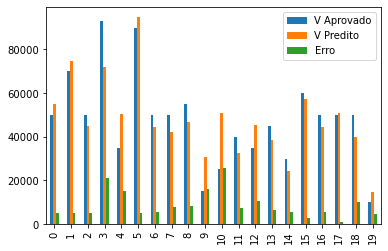

In [8]:
y_pred = model.predict(X_test)
predictions=y_pred[:,0]
predictions=predictions.astype(int)
erros = np.absolute( y_test - predictions)
finalresult = pd.DataFrame({
        "V Aprovado": y_test,
        "V Predito": predictions,
        "Erro" : erros
    })

finalresult.head(20).plot(kind='bar')


In [32]:
print(median_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

2479.92919921875
23458932.770895626


<AxesSubplot:>

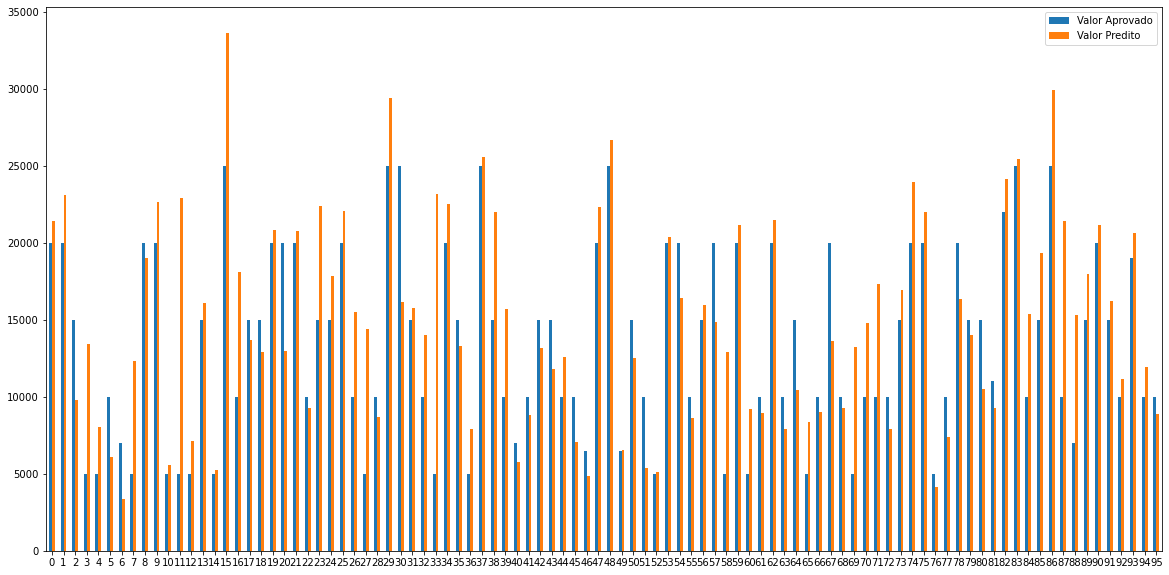

In [33]:
dfresult = pd.DataFrame({
        "Valor Aprovado": y_test,
        "Valor Predito": y_pred[:,0]
    })
dfresult.plot.bar(rot=0, figsize = (20,10))